In [928]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.colors as colors

import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

In [929]:
cal = fetch_california_housing()

data = pd.DataFrame(data=np.c_[cal["data"], cal["target"]], columns=cal["feature_names"] + cal["target_names"])

data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


Калифорния в наше время особенно известна тем, как там плохо жить. Выбранный датасет содержит в себе информацию, связанную с жильем, полученную на основе переписи населения 1990 года. Попробуем путем анализа набора данных ответить на вопрос, где все же лучше всего живется в данном штате.

Так как нам не требуется точность вычислений и нормализация значений для машинного обучения, приведем значения в более читаемый вид

In [930]:
def norm(vect):
    return (vect - min(vect)) / (max(vect) - min(vect))

In [931]:
# Значения представлены в промежутке от 0.5 до 15, причем неясно, в какой единице измерения, поэтому просто нормализуем их
data["MedInc"] = norm(data["MedInc"])
# Значения представлены в сотнях тысяч долларов, поэтому переведем их в доллары
data["MedHouseVal"] = data["MedHouseVal"] * 100000
data["MedHouseVal"] = data["MedHouseVal"].astype("int")

data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,0.539668,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,452600
1,0.538027,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,358500
2,0.466028,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,352100
3,0.354699,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,341300
4,0.230776,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,342200


Будем считать, что самое лучшее место для жизни - это место, где дома новые и дешевые, имеют много комнат и мало богатых соседей. Набор данных предоставляет нам широту и долготу, что позволяет нарисовать много карт, но для начала хотелось бы оценить, о каком порядке стоимости жилья идет речь.

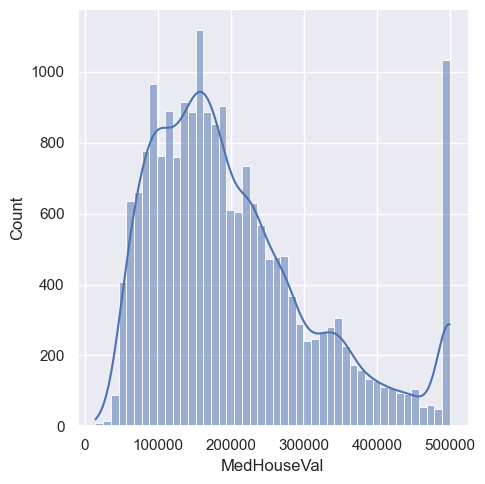

In [932]:
sns.displot(data=data["MedHouseVal"], kde=True)

Таким образом, мы говорим о ценах в промежутке от 100000$ до 200000$. По текущему курсу цены получаются где-то в районе 10-20 млн. руб. Однако если вспомнить про инфляцию и рост цен на жилье в США за последние 30 лет, можно с уверенностью сказать, что большинство из нас никогда не смогут владеть жильем в Калифорнии. Но это не проблема, ведь, как известно, Калифорния - далеко не лучший штат для жизни. 

Критерии выбора жилья были перечислены выше, поэтому предлагаю построить карты по каждому из показателей в отдельности, а затем сформировать единый общий показатель качества жизни.

Первый показатель - возраст жилья. Построим карту.

/tmp/ipykernel_13334/3005021507.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(markerscale=0.1)


<Axes: xlabel='Longitude', ylabel='Latitude'>

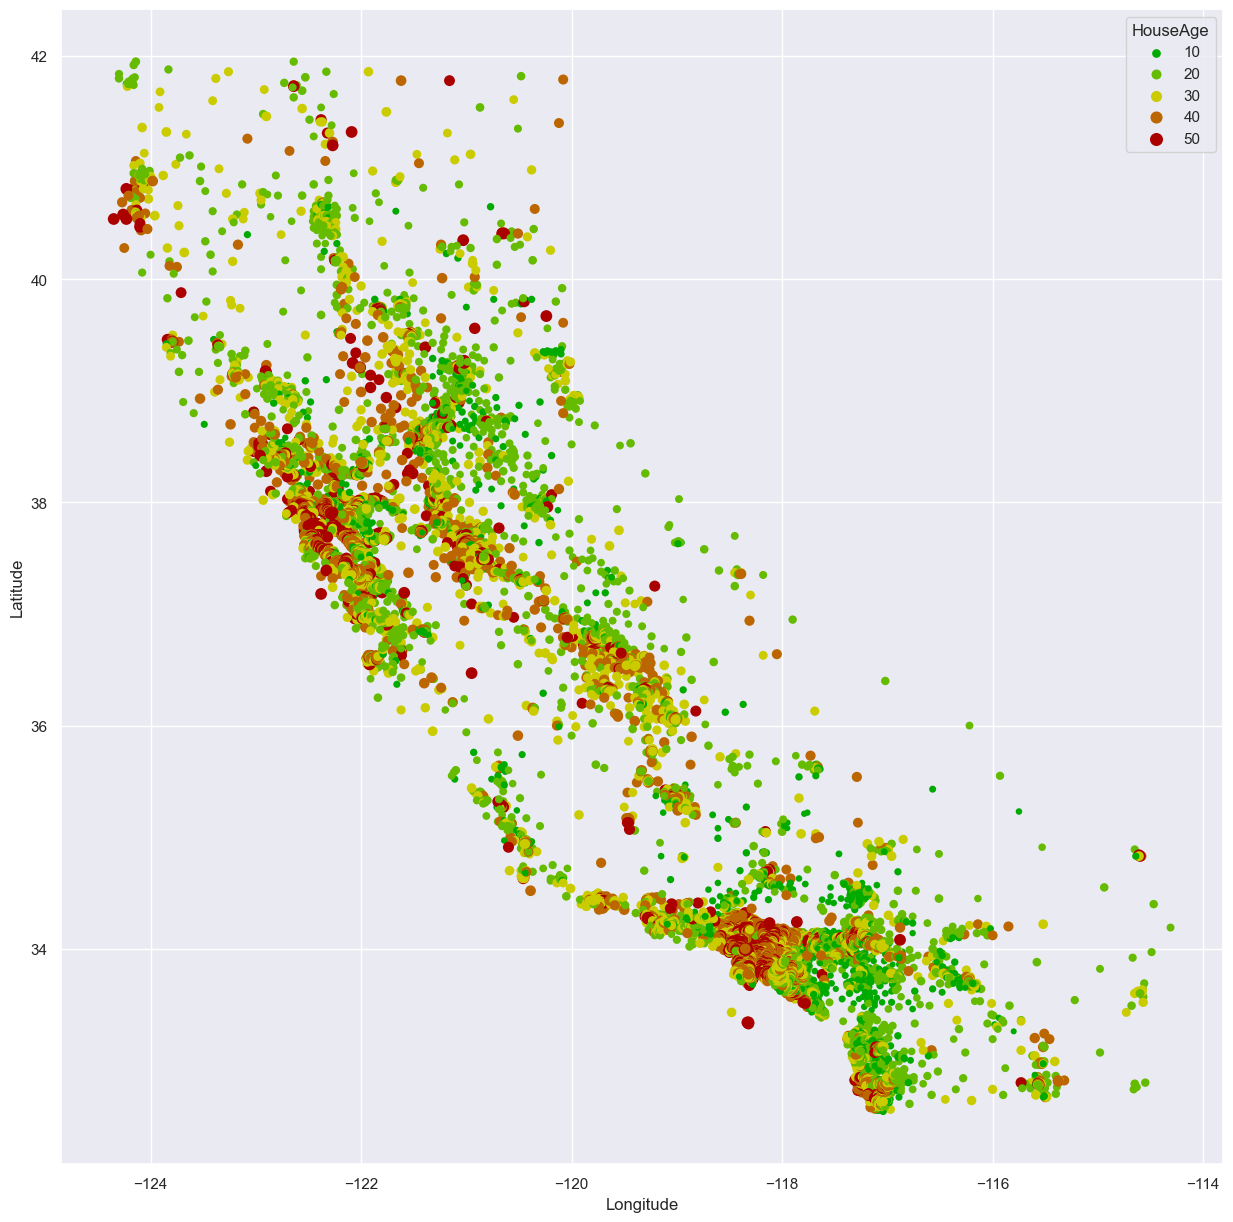

In [933]:
RYB = colors.LinearSegmentedColormap.from_list("", ["#aa0000", "#cccc00", "#00aa00"])
RYB_SEGM = colors.ListedColormap(RYB(np.linspace(start=0, stop=1, num=5)))
RYB_REVERSED = RYB.reversed()
RYB_SEGM_REVERSED = RYB_SEGM.reversed()

sns.set_theme(rc={"figure.figsize": (15, 15)})
plt.legend(markerscale=0.1)

sns.scatterplot(
    data=data["HouseAge"],
    x=data["Longitude"],
    y=data["Latitude"],
    hue=data["HouseAge"],
    palette=RYB_SEGM_REVERSED,
    size=data["HouseAge"],
    linewidth=0,
)

По карте трудно однозначно назвать области, где дома старше или новее. В целом, вдоль северо-западного побережья или равнин к востоку от него жилье, кажется, старше.

Теперь построим карту стоимости жилья.

<Axes: xlabel='Longitude', ylabel='Latitude'>

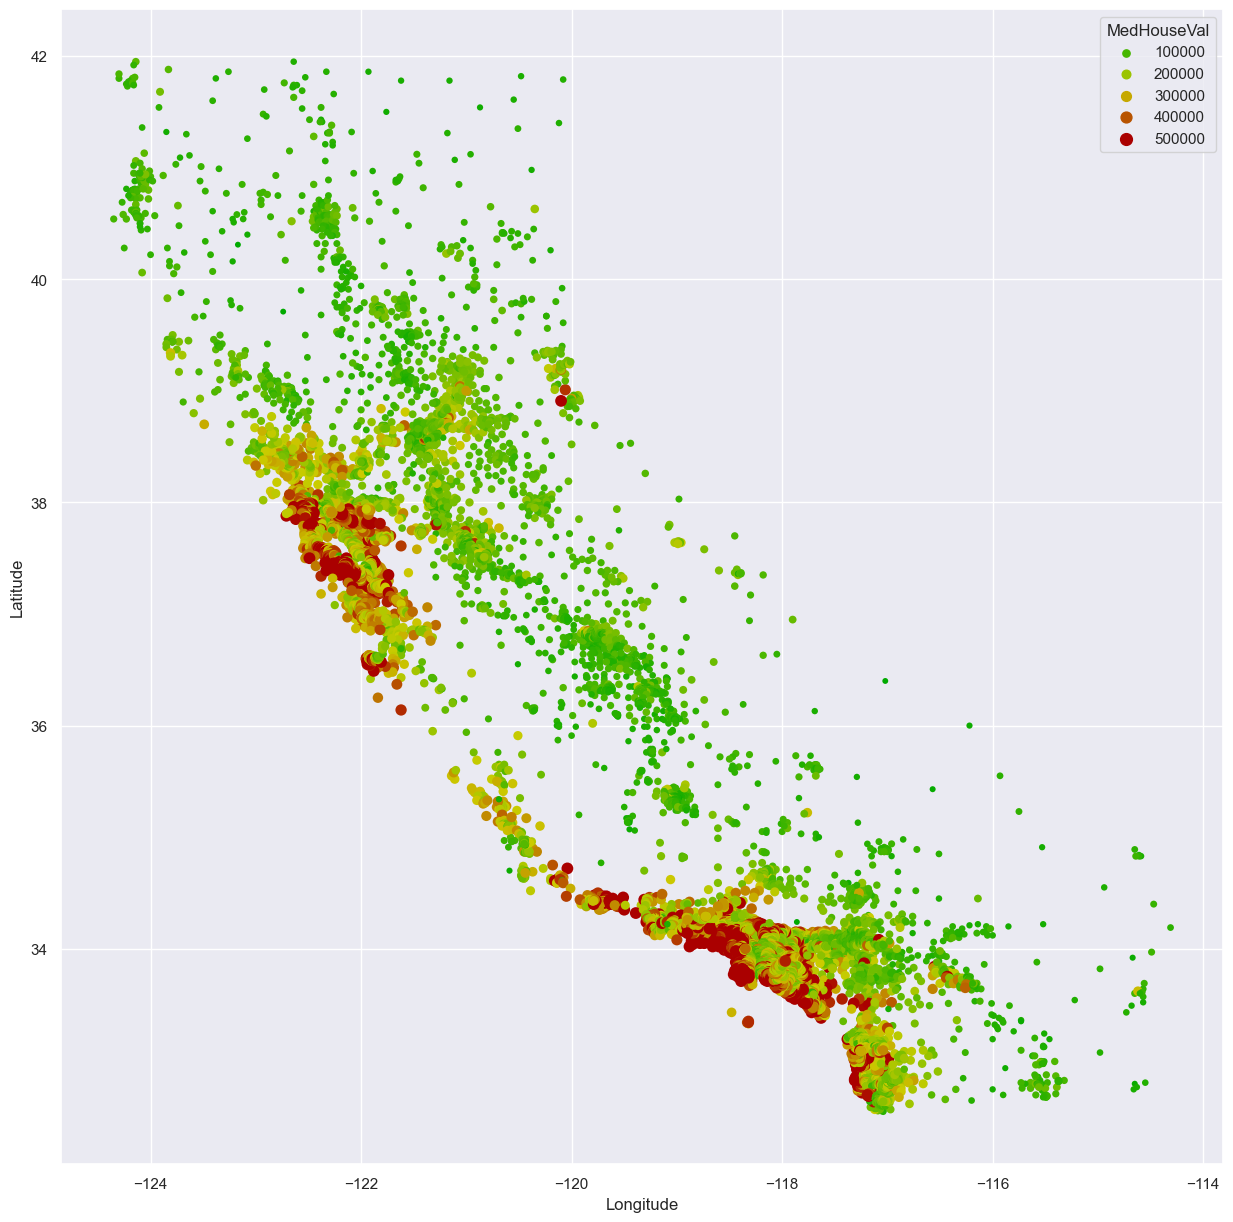

In [934]:
sns.scatterplot(
    data=data["MedHouseVal"],
    x=data["Longitude"],
    y=data["Latitude"],
    hue=data["MedHouseVal"],
    palette=RYB_REVERSED,
    size=data["MedHouseVal"],
    linewidth=0,
)

Здесь очевидна закономерность: чем ближе к побережью, тем дороже.

Построим карту количества комнат на единицу жилья.

<Axes: xlabel='Longitude', ylabel='Latitude'>

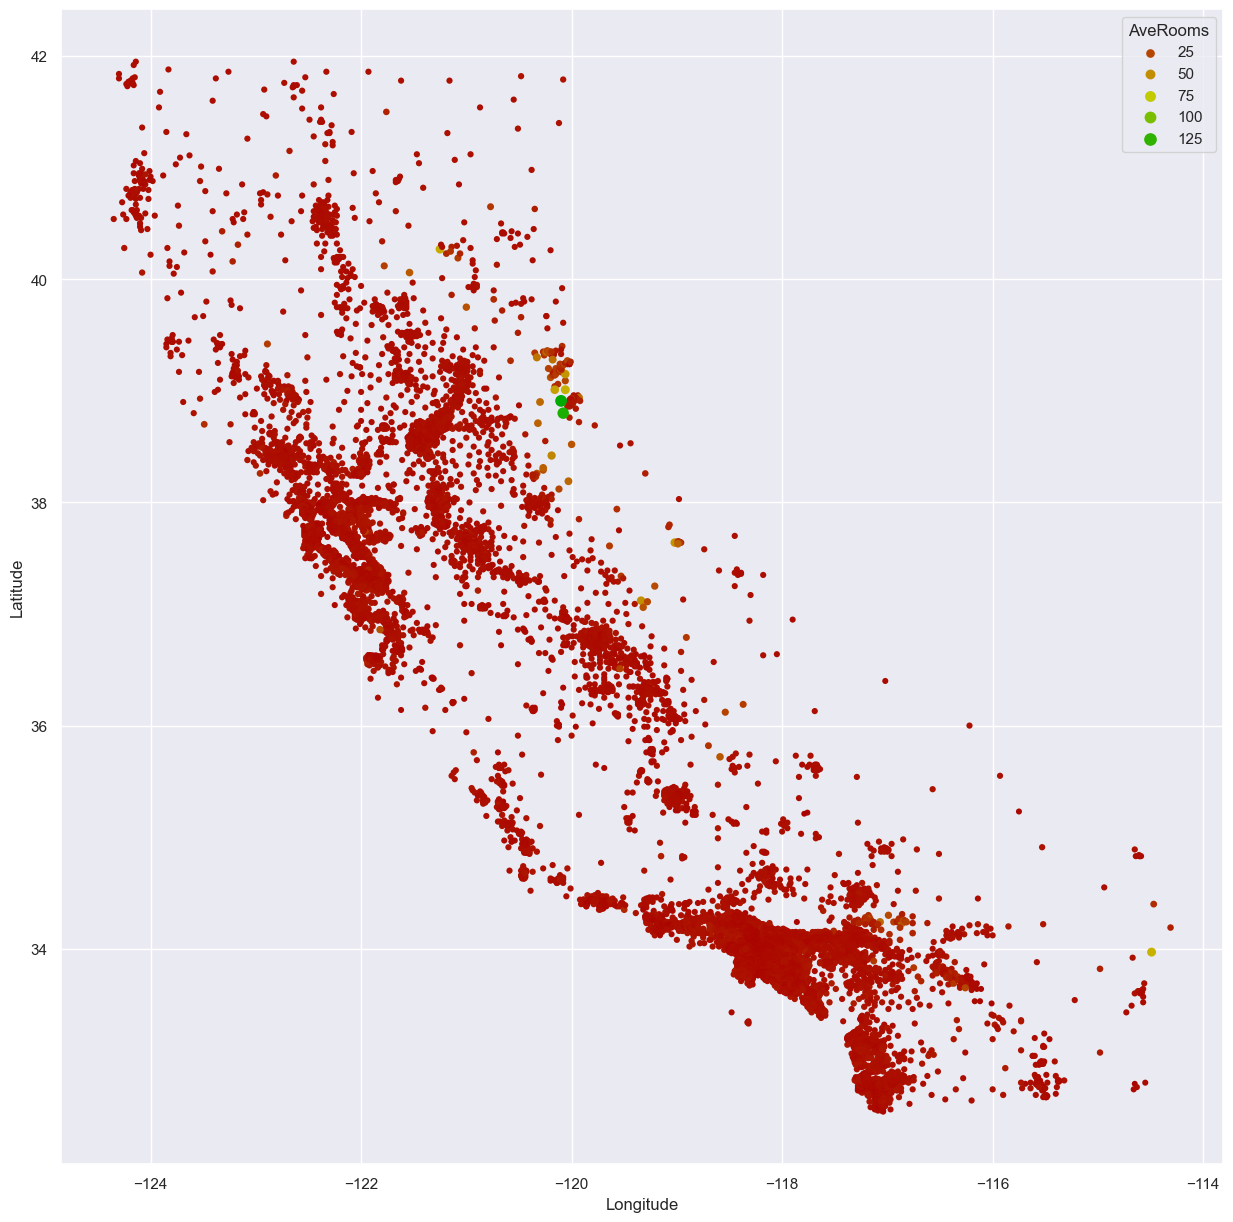

In [935]:
sns.scatterplot(
    data=data["AveRooms"],
    x=data["Longitude"],
    y=data["Latitude"],
    hue=data["AveRooms"],
    palette=RYB,
    size=data["AveRooms"],
    linewidth=0,
)

Значения вышли слишком близкими к одному из концов спектра. Нужно подобрать функцию нормализации. 

<Axes: xlabel='Longitude', ylabel='Latitude'>

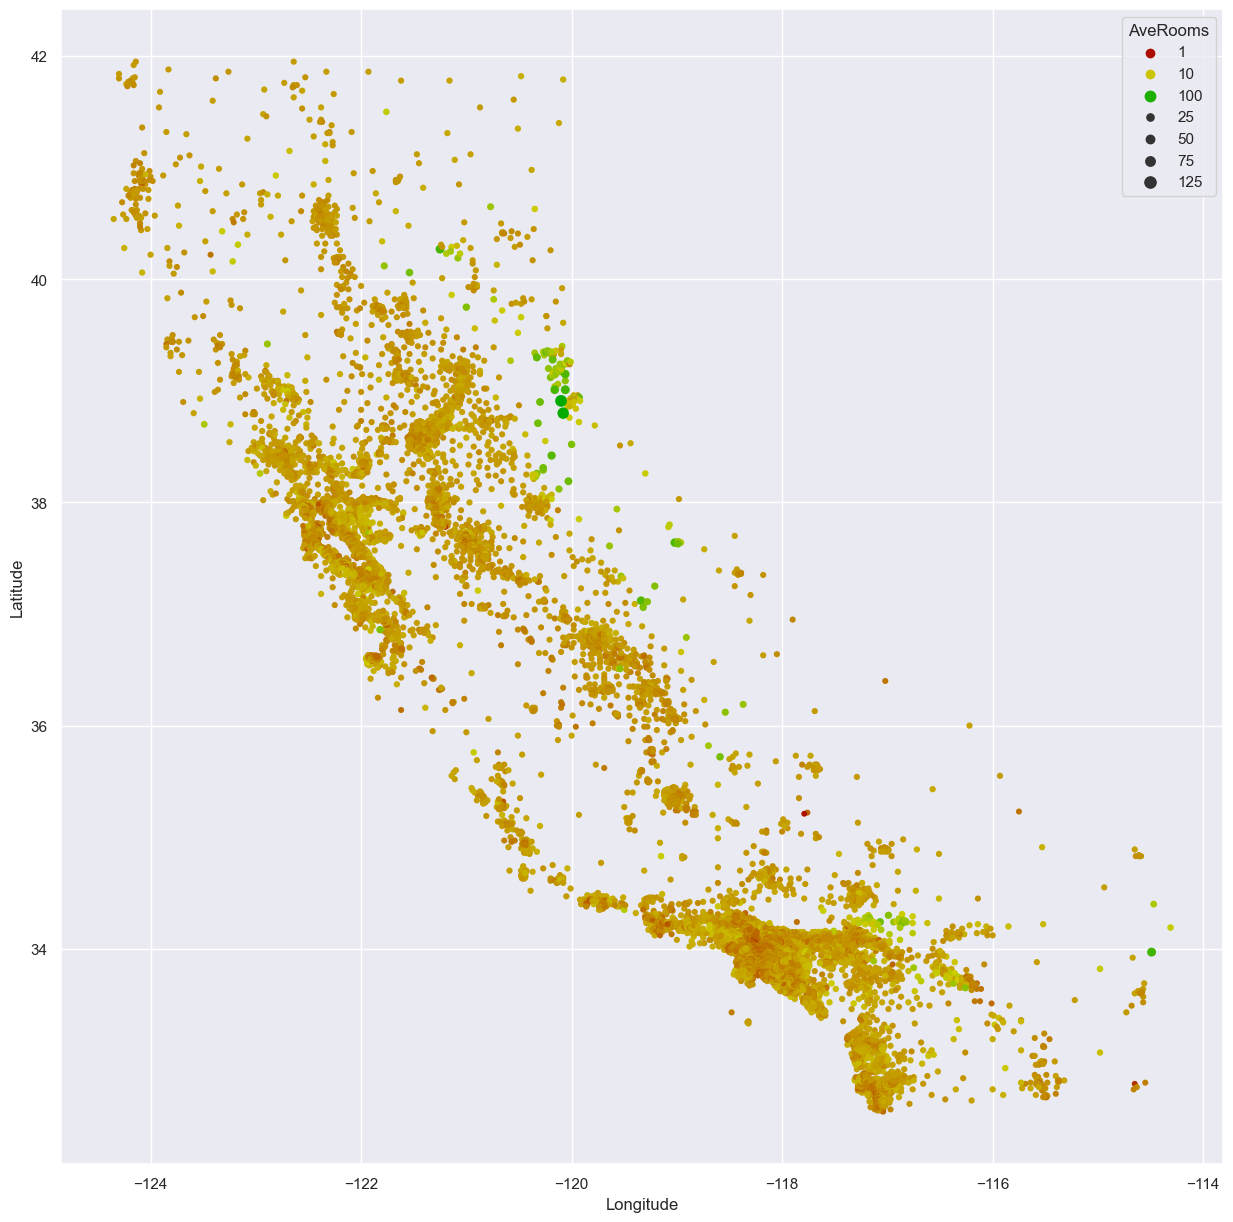

In [936]:
sns.scatterplot(
    data=data["AveRooms"],
    x=data["Longitude"],
    y=data["Latitude"],
    hue=data["AveRooms"],
    palette=RYB,
    size=data["AveRooms"],
    linewidth=0,
    hue_norm=colors.LogNorm(),
)

По такой карте видно, что большая часть жилья имеет примерно один и тот же размер. Тем не менее, жильше с большим количеством комнат находится, как правило, ближе к восточной границе северной части штата и на юго-востоке. Жилье меньших размеров находится по соседству с областями, где стоимость жилья самая высокая.

Построим карту плотности населения по штату.

<Axes: xlabel='Longitude', ylabel='Latitude'>

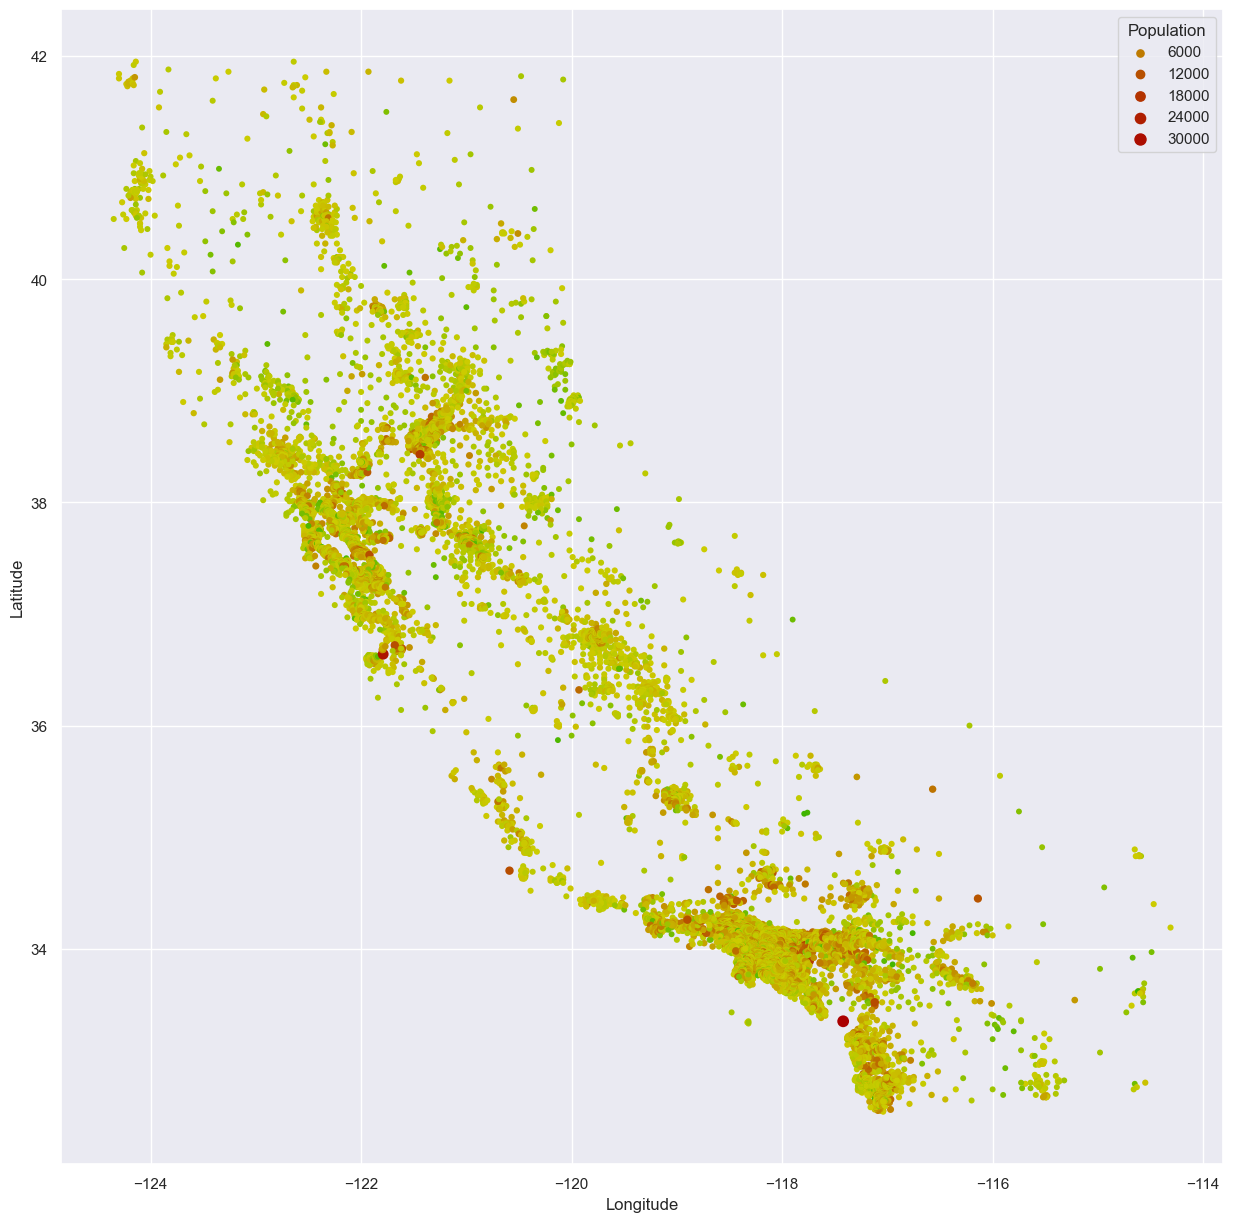

In [937]:
sns.scatterplot(
    data=data["Population"],
    x=data["Longitude"],
    y=data["Latitude"],
    hue=data["Population"],
    palette=RYB_REVERSED,
    size=data["Population"],
    linewidth=0,
    hue_norm=colors.PowerNorm(0.2),
)

Здесь ничего удивительного, население концентрируется в городах.

Последний фактор - доход населения. Чем больше зарабатывают люди, тем лучше живется.

<Axes: xlabel='Longitude', ylabel='Latitude'>

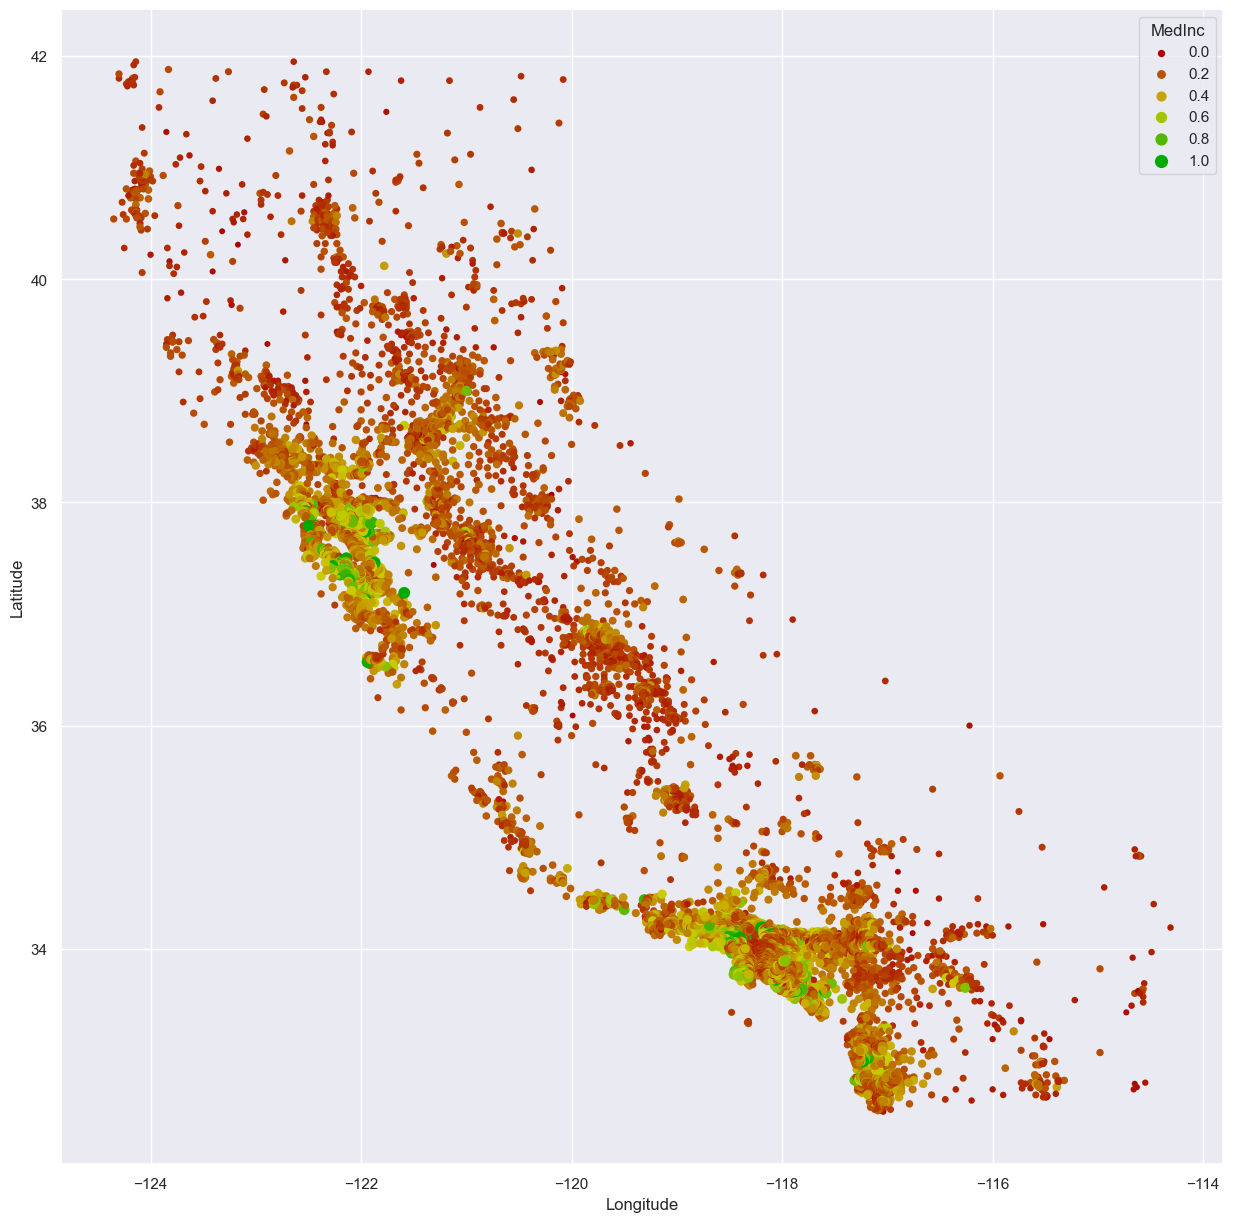

In [938]:
sns.scatterplot(
    data=data["MedInc"],
    x=data["Longitude"],
    y=data["Latitude"],
    hue=data["MedInc"],
    palette=RYB,
    size=data["MedInc"],
    linewidth=0,
)

Здесь тоже ничего неожиданного, деньги концентрируются рядом с большими городами, которые находятся ближе к побережью.

Итак, высчитаем критерий средней оценки, которым мы будем пользоваться для выбора лучшего места для жизни.

In [939]:
rows = data.shape[0]
one = [1 for _ in range(rows)]

data["HouseAge"] = one - (data["HouseAge"] - min(data["HouseAge"])) / (
    max(data["HouseAge"]) - min(data["HouseAge"])
)
data["MedHouseVal"] = one - (data["MedHouseVal"] - min(data["MedHouseVal"])) / (
    max(data["MedHouseVal"]) - min(data["MedHouseVal"])
)

data["AveRooms"] = np.log10(data["AveRooms"])
data["AveRooms"] = (data["AveRooms"] - min(data["AveRooms"])) / (
    max(data["AveRooms"]) - min(data["AveRooms"])
)
data["Population"] = np.log10(data["Population"])
data["Population"] = one - (data["Population"] - min(data["Population"])) / (
    max(data["Population"]) - min(data["Population"])
)
data["MedInc"] = (data["MedInc"] - min(data["MedInc"])) / (
    max(data["MedInc"]) - min(data["MedInc"])
)

data["Crit"] = (
    data["HouseAge"]
    + data["MedHouseVal"]
    + data["AveRooms"]
    + data["Population"]
    + data["MedInc"]
)

data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,Crit
0,0.539668,0.215686,0.412065,1.023810,0.501700,2.555556,37.88,-122.23,0.097732,1.766851
1,0.538027,0.607843,0.390012,0.971880,0.287598,2.109842,37.86,-122.22,0.291752,2.115232
2,0.466028,0.000000,0.445485,1.073446,0.455661,2.802260,37.85,-122.24,0.304948,1.672121
3,0.354699,0.000000,0.376378,1.073059,0.443109,2.547945,37.85,-122.25,0.327216,1.501402
4,0.230776,0.000000,0.391375,1.081081,0.441781,2.181467,37.85,-122.25,0.325360,1.389292


Построим карту критерия.

<Axes: xlabel='Longitude', ylabel='Latitude'>

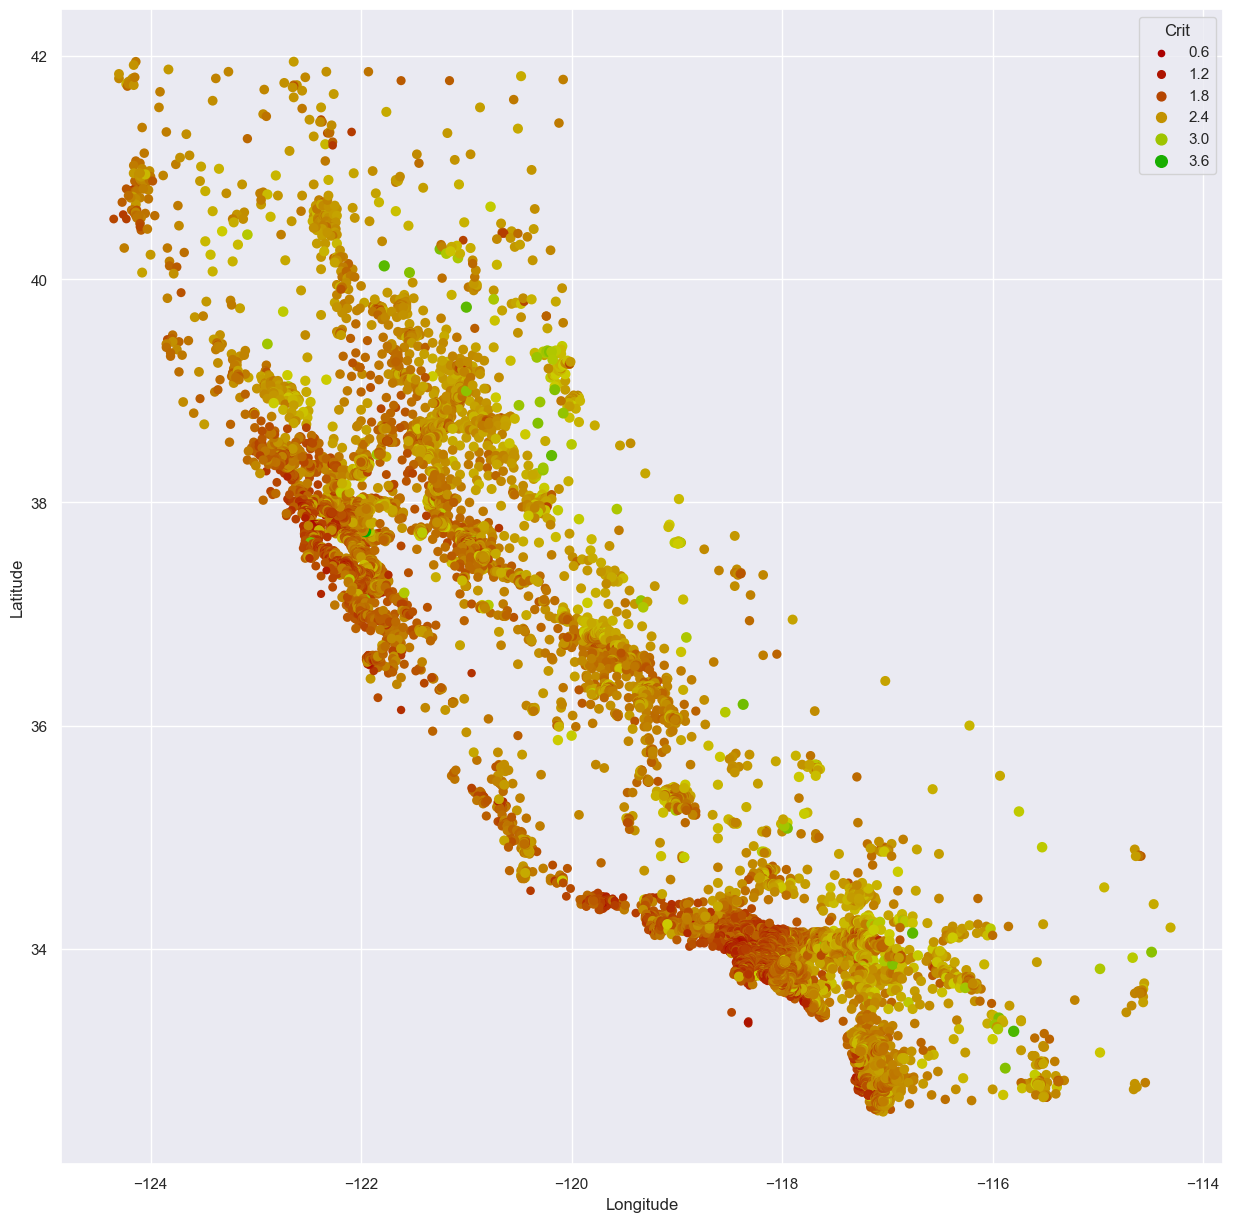

In [940]:
sns.scatterplot(
    data=data["Crit"],
    x=data["Longitude"],
    y=data["Latitude"],
    hue=data["Crit"],
    palette=RYB,
    size=data["Crit"],
    linewidth=0,
    hue_norm=colors.PowerNorm(2),
)

Итак, по карте можно увидеть, что лучшие для жизни места находятся недалеко от озер, но не совсем рядом с ними. В частности, скопление зеленых точек можно наблюдать к юго-западу от озера Тахо.